<a href="https://colab.research.google.com/github/Bena-29/DATA-SCIENCE/blob/main/group_5_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
##importinf data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/loan_eligibility_dataset_large.csv')
data

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,LN000001,CU000001,1,6063,Short Term,369,5 years,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0
1,LN000002,CU000002,0,41253,Short Term,440,4 years,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0
2,LN000003,CU000003,0,30262,Short Term,502,1 years,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0
3,LN000004,CU000004,1,37536,Short Term,561,10 years,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0
4,LN000005,CU000005,1,5880,Long Term,778,1 years,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,LN099996,CU099996,0,21323,Short Term,337,8 years,Rent,78955,Business Loan,1053.27,29.4,NaN,24,1,36182,132264,0.0,1.0
99996,LN099997,CU099997,0,19158,Long Term,702,6 years,Rent,77116,Home Improvements,1026.94,27.1,62.0,13,3,26348,43536,0.0,0.0
99997,LN099998,CU099998,1,38713,Short Term,567,< 1 year,Home Mortgage,69427,Home Improvements,1205.37,2.0,6.0,13,0,60141,10546,0.0,0.0
99998,LN099999,CU099999,1,18105,Short Term,500,8 years,Own Home,98044,Debt Consolidation,1534.85,1.2,45.0,1,4,92921,140283,1.0,0.0


In [ ]:
####chnaging from object to float

data['Years_in_current_job'] = data['Years_in_current_job'].str.replace(' years', '', regex=False)
data['Years_in_current_job'] = data['Years_in_current_job'].str.replace('< 1 year', '0.5', regex=False)
data['Years_in_current_job'] = data['Years_in_current_job'].str.replace('10+', '10', regex=False)

data['Years_in_current_job'] = data['Years_in_current_job'].astype(float)

data.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,LN000001,CU000001,1,6063,Short Term,369,5.0,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0
1,LN000002,CU000002,0,41253,Short Term,440,4.0,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0
2,LN000003,CU000003,0,30262,Short Term,502,1.0,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0
3,LN000004,CU000004,1,37536,Short Term,561,10.0,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0
4,LN000005,CU000005,1,5880,Long Term,778,1.0,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0


In [ ]:
data.describe()

,Loan_Status,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,100000.000000,100000.000000,100000.000000,91791.000000,100000.000000,100000.000000,100000.000000,90039.000000,100000.000000,100000.000000,100000.00000,100000.000000,98992.000000,97927.000000
mean,0.701110,25489.074900,575.213890,5.053720,85151.063660,1049.960812,15.517398,60.498639,15.006680,1.991420,50111.57133,75755.490260,0.233746,0.081785
std,0.457774,14127.375454,158.891739,3.091175,37572.003342,548.256901,8.381116,34.641765,8.365619,1.413947,28838.42456,42993.138907,0.510107,0.274039
min,0.000000,1000.000000,300.000000,0.500000,20000.000000,100.010000,1.000000,1.000000,1.000000,0.000000,100.00000,1000.000000,0.000000,0.000000
25%,0.000000,13220.750000,438.000000,2.000000,52603.750000,574.460000,8.200000,31.000000,8.000000,1.000000,25154.75000,38664.000000,0.000000,0.000000
50%,1.000000,25496.000000,575.000000,5.000000,85072.500000,1051.520000,15.500000,60.000000,15.000000,2.000000,50054.00000,75836.500000,0.000000,0.000000
75%,1.000000,37733.000000,713.000000,8.000000,117745.250000,1522.915000,22.800000,91.000000,22.000000,3.000000,75050.25000,113068.750000,0.000000,0.000000
max,1.000000,49999.000000,849.000000,10.000000,149997.000000,1999.990000,30.000000,120.000000,29.000000,4.000000,99999.00000,149997.000000,2.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Loan_ID                        100000 non-null  object 
 1   Customer_ID                    100000 non-null  object 
 2   Loan_Status                    100000 non-null  int64  
 3   Current_Loan_Amount            100000 non-null  int64  
 4   Term                           100000 non-null  object 
 5   Credit_Score                   100000 non-null  int64  
 6   Years_in_current_job           91791 non-null   float64
 7   Home_Ownership                 100000 non-null  object 
 8   Annual_Income                  100000 non-null  int64  
 9   Purpose                        100000 non-null  object 
 10  Monthly_Debt                   100000 non-null  float64
 11  Years_of_Credit_History        100000 non-null  float64
 12  Months_since_last_delinquency  

In [ ]:
##test and split
####Targets and features
y=data['Loan_Status']
y
x=data.drop('Loan_Status', axis=1)
x

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,LN000001,CU000001,6063,Short Term,369,5.0,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0
1,LN000002,CU000002,41253,Short Term,440,4.0,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0
2,LN000003,CU000003,30262,Short Term,502,1.0,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0
3,LN000004,CU000004,37536,Short Term,561,10.0,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0
4,LN000005,CU000005,5880,Long Term,778,1.0,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,LN099996,CU099996,21323,Short Term,337,8.0,Rent,78955,Business Loan,1053.27,29.4,NaN,24,1,36182,132264,0.0,1.0
99996,LN099997,CU099997,19158,Long Term,702,6.0,Rent,77116,Home Improvements,1026.94,27.1,62.0,13,3,26348,43536,0.0,0.0
99997,LN099998,CU099998,38713,Short Term,567,0.5,Home Mortgage,69427,Home Improvements,1205.37,2.0,6.0,13,0,60141,10546,0.0,0.0
99998,LN099999,CU099999,18105,Short Term,500,8.0,Own Home,98044,Debt Consolidation,1534.85,1.2,45.0,1,4,92921,140283,1.0,0.0


In [ ]:
####Split and Train
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=20) #value under random_state = seed
print(x_train)
print(x_test)
print(y_train)
print(y_test)

        Loan_ID Customer_ID  Current_Loan_Amount        Term  Credit_Score  \
46985  LN046986    CU046986                 6596   Long Term           516   
64599  LN064600    CU064600                28460   Long Term           384   
85534  LN085535    CU085535                26300  Short Term           667   
50616  LN050617    CU050617                 8686   Long Term           510   
90033  LN090034    CU090034                44751  Short Term           513   
...         ...         ...                  ...         ...           ...   
31962  LN031963    CU031963                44549  Short Term           753   
88988  LN088989    CU088989                39717  Short Term           786   
23775  LN023776    CU023776                35526  Short Term           592   
37135  LN037136    CU037136                21263  Short Term           751   
92634  LN092635    CU092635                49274   Long Term           576   

       Years_in_current_job Home_Ownership  Annual_Income      

In [ ]:
##imputing missing values
from sklearn.impute import SimpleImputer

In [ ]:

#with the 'number' value we are returning all numeric columns- integer columns and float
num_cols=x_train.select_dtypes('number').columns
num_cols

Index(['Current_Loan_Amount', 'Credit_Score', 'Years_in_current_job',
       'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquency', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [ ]:
x_train[num_cols].isna().sum()

,0
Current_Loan_Amount,0
Credit_Score,0
Years_in_current_job,6621
Annual_Income,0
Monthly_Debt,0
Years_of_Credit_History,0
Months_since_last_delinquency,7945
Number_of_Open_Accounts,0
Number_of_Credit_Problems,0
Current_Credit_Balance,0


In [ ]:
# Instantiate the imputer object from the SimpleImputer class with strategy 'median'
impute_median = SimpleImputer(strategy='median')

In [ ]:
# Fit the imputer object on the numeric training data with .fit()
impute_median.fit(x_train[num_cols])

SimpleImputer(strategy='median')

In [ ]:
# Change settings to ouput a dataframe
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
##Transform the training data
X_train_imputed= impute_median.transform(x_train[num_cols])
#Transform the testing data
X_test_imputed = impute_median.transform(x_test[num_cols])

In [ ]:
##TRANSFORMATION
impute_median.transform(x_train[num_cols])
impute_median.transform(x_test[num_cols])


,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
45218,48211.0,371.0,7.0,100277.0,1877.05,2.2,54.0,4.0,1.0,44763.0,33550.0,0.0,0.0
74763,15529.0,812.0,0.5,83116.0,1440.73,11.0,111.0,27.0,4.0,78293.0,145271.0,0.0,0.0
43778,47841.0,810.0,0.5,118801.0,1090.19,15.5,41.0,25.0,2.0,68311.0,108550.0,0.0,0.0
75551,7458.0,669.0,3.0,44538.0,1015.04,3.5,54.0,24.0,4.0,96223.0,147696.0,0.0,0.0
10086,20829.0,848.0,5.0,52200.0,684.49,11.8,19.0,6.0,3.0,41556.0,98995.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60734,45962.0,471.0,5.0,30123.0,604.88,11.2,15.0,4.0,3.0,74540.0,145858.0,1.0,0.0
86735,40547.0,819.0,9.0,66686.0,419.70,12.8,67.0,7.0,3.0,14236.0,118951.0,1.0,0.0
56498,48078.0,744.0,4.0,136485.0,1653.03,16.1,60.0,3.0,3.0,67030.0,123898.0,0.0,1.0
786,45088.0,379.0,1.0,46531.0,101.09,16.8,54.0,7.0,0.0,55936.0,87705.0,0.0,0.0


In [ ]:
#Checking for missing values in the training set
null_counter1 = X_train_imputed[num_cols].isna().sum()
null_counter1[null_counter1>0]
#checking for missing values in the test set- after transformation
null_counter2 = X_test_imputed[num_cols].isna().sum()
null_counter2[null_counter2>0]

,0


In [ ]:
cat_cols = x_train.select_dtypes('object').columns

x_train[cat_cols].isna().sum()

,0
Loan_ID,0
Customer_ID,0
Term,0
Home_Ownership,0
Purpose,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
###Checking for categorical variables
categorical_cols = x_train.select_dtypes('object').columns
x_train[categorical_cols]

,Loan_ID,Customer_ID,Term,Home_Ownership,Purpose
46985,LN046986,CU046986,Long Term,Own Home,Home Improvements
64599,LN064600,CU064600,Long Term,Home Mortgage,Home Improvements
85534,LN085535,CU085535,Short Term,Home Mortgage,Home Improvements
50616,LN050617,CU050617,Long Term,Own Home,Medical Bills
90033,LN090034,CU090034,Short Term,Rent,Business Loan
...,...,...,...,...,...
31962,LN031963,CU031963,Short Term,Rent,Business Loan
88988,LN088989,CU088989,Short Term,Home Mortgage,Debt Consolidation
23775,LN023776,CU023776,Short Term,Rent,Medical Bills
37135,LN037136,CU037136,Short Term,Rent,Buy a Car


In [ ]:
x_train[categorical_cols].columns

Index(['Loan_ID', 'Customer_ID', 'Term', 'Home_Ownership', 'Purpose'], dtype='object')

In [ ]:
nominal_cols = ['Loan_ID', 'Customer_ID', 'Term', 'Home_Ownership', 'Purpose']
nominal_cols

['Loan_ID', 'Customer_ID', 'Term', 'Home_Ownership', 'Purpose']

In [ ]:
 #Instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
ohe_encoder.fit(x_train[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
x_train_ohe = ohe_encoder.transform(x_train[categorical_cols])
x_test_ohe = ohe_encoder.transform(x_test[categorical_cols])
print(x_train_ohe)
print(x_test_ohe)

       Loan_ID_LN000001  Loan_ID_LN000002  Loan_ID_LN000003  Loan_ID_LN000005  \
46985               0.0               0.0               0.0               0.0   
64599               0.0               0.0               0.0               0.0   
85534               0.0               0.0               0.0               0.0   
50616               0.0               0.0               0.0               0.0   
90033               0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
31962               0.0               0.0               0.0               0.0   
88988               0.0               0.0               0.0               0.0   
23775               0.0               0.0               0.0               0.0   
37135               0.0               0.0               0.0               0.0   
92634               0.0               0.0               0.0               0.0   

       Loan_ID_LN000006  Lo

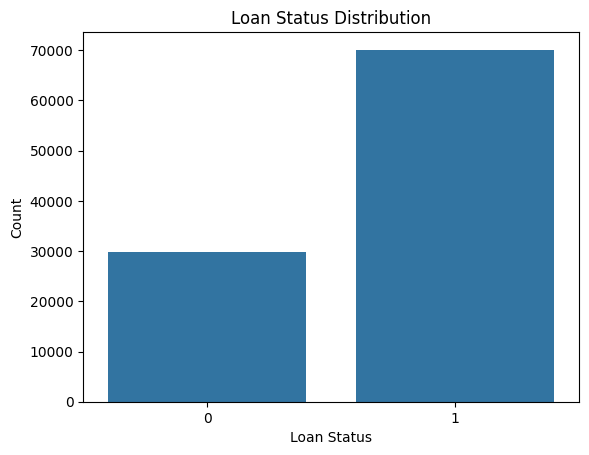

In [ ]:
####visualisationsfor loan status
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [ ]:
#correlation matrix
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

,Loan_Status,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Loan_Status,1.000000,-0.001977,-0.002222,0.002787,0.003177,0.004801,0.001031,-0.005175,-0.000348,-0.002293,-0.003652,0.001792,0.007963,0.000382
Current_Loan_Amount,-0.001977,1.000000,0.004202,0.000092,-0.000733,0.007162,0.000969,0.002228,-0.000379,-0.002505,0.002938,0.003639,-0.004896,0.004276
Credit_Score,-0.002222,0.004202,1.000000,-0.004906,-0.000318,0.005836,-0.000514,0.001441,0.004283,-0.000310,-0.003678,0.001918,-0.004210,0.007414
Years_in_current_job,0.002787,0.000092,-0.004906,1.000000,-0.001980,-0.001055,0.007459,0.003873,0.000897,-0.004515,0.001457,-0.007605,-0.001240,-0.007649
Annual_Income,0.003177,-0.000733,-0.000318,-0.001980,1.000000,-0.002537,-0.002091,0.003738,-0.002904,-0.006171,0.002602,-0.002850,0.004116,0.000924
Monthly_Debt,0.004801,0.007162,0.005836,-0.001055,-0.002537,1.000000,-0.003367,-0.000262,0.004006,-0.005766,0.002976,0.003355,0.003407,-0.003755
Years_of_Credit_History,0.001031,0.000969,-0.000514,0.007459,-0.002091,-0.003367,1.000000,-0.000789,-0.001159,0.006434,-0.001292,0.003477,-0.001507,-0.001855
Months_since_last_delinquency,-0.005175,0.002228,0.001441,0.003873,0.003738,-0.000262,-0.000789,1.000000,0.007845,0.000362,-0.001614,-0.000132,-0.004251,-0.001180
Number_of_Open_Accounts,-0.000348,-0.000379,0.004283,0.000897,-0.002904,0.004006,-0.001159,0.007845,1.000000,0.000453,0.000569,-0.003957,-0.003998,0.001265
Number_of_Credit_Problems,-0.002293,-0.002505,-0.000310,-0.004515,-0.006171,-0.005766,0.006434,0.000362,0.000453,1.000000,0.000189,-0.005563,0.004176,0.000511


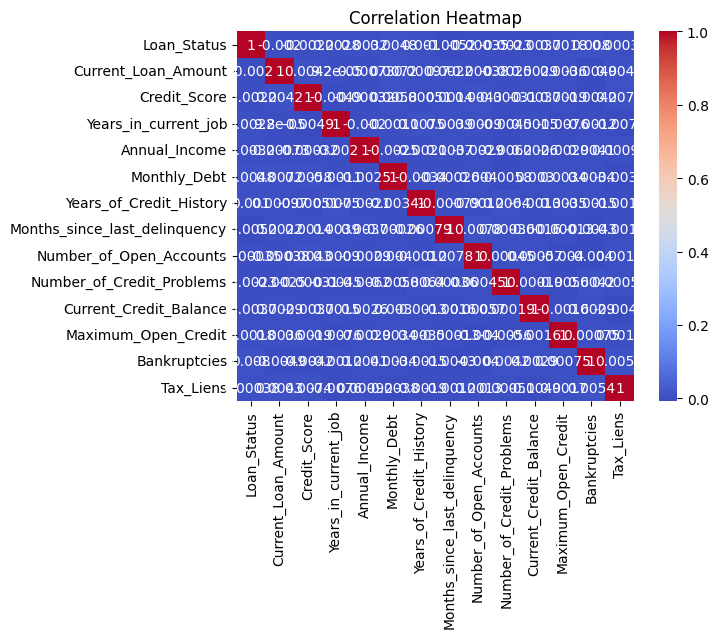

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#checking for class balance
y_train.value_counts()

,count
Loan_Status,
1,56152
0,23848
